# Using imagery on AWS S3 with Python

The [boto3](https://boto3.amazonaws.com/v1/documentation/api/latest/index.html) library allows access to a client, which is a lower-level API to the Amazon Web Services. Here we'll use it to download a file from S3 into memory. First, we create a client, request a download, then access the content.

In [30]:
import boto3
KEY = "JRC2018_Unisex_20x_HR/FlyLight_Gen1_GAL4/R10C09-20090919_08_fA01b_20090919091328496-GAL4-f-20x-brain-JRC2018_Unisex_20x_HR-CDM_1.png"
S3_CLIENT = boto3.client('s3')
s3_response_object = S3_CLIENT.get_object(Bucket="janelia-flylight-color-depth",
                                          Key=KEY)
object_content = s3_response_object['Body'].read()

We now have the file contents in memory. The file is an image, so we can use [Pillow](https://pillow.readthedocs.io/en/stable/) (a fork of the older Python Imaging Library) to convert it to an **Image** object:

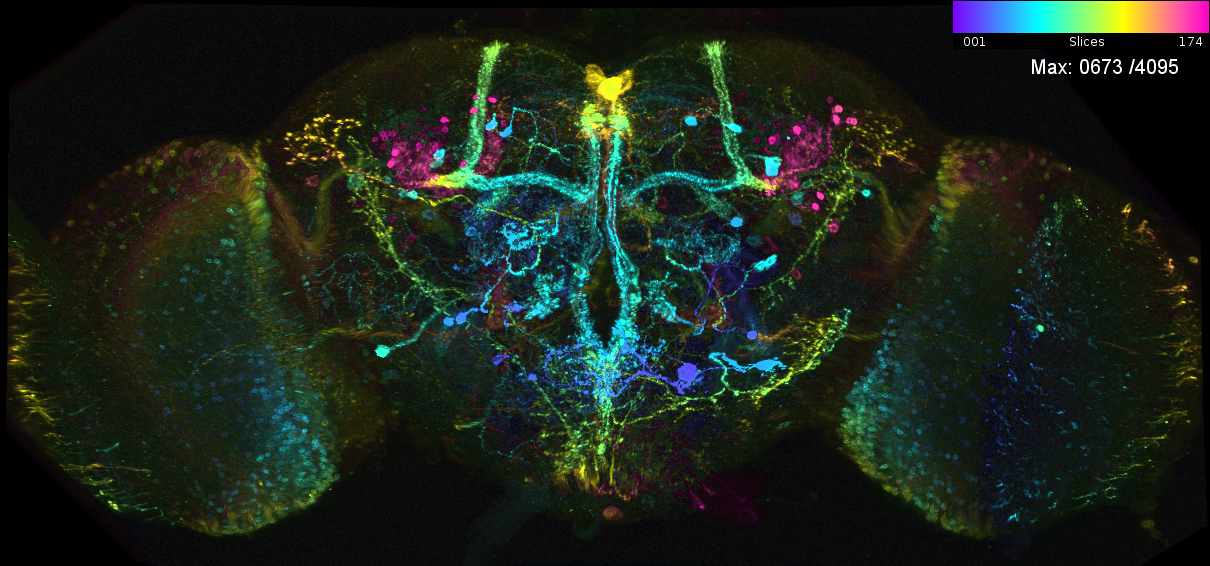

In [31]:
from PIL import Image, ImageEnhance
from io import BytesIO
dataBytesIO = BytesIO(object_content)
img = Image.open(dataBytesIO)
img

Once we have the image in memory as a PIL **[Image](https://pillow.readthedocs.io/en/stable/reference/Image.html)** object, we can modify it. Let's resize it to 50% of its original size:

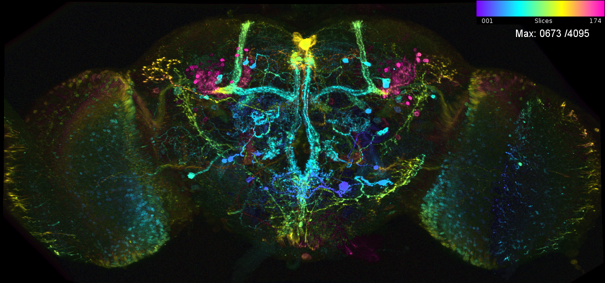

In [32]:
width, height = img.size
img.resize((int(width / 2), int(height / 2)))

Let's look at a file from the janelia-flylight-imagery bucket (we'll resize it so it's a little easier to work with):

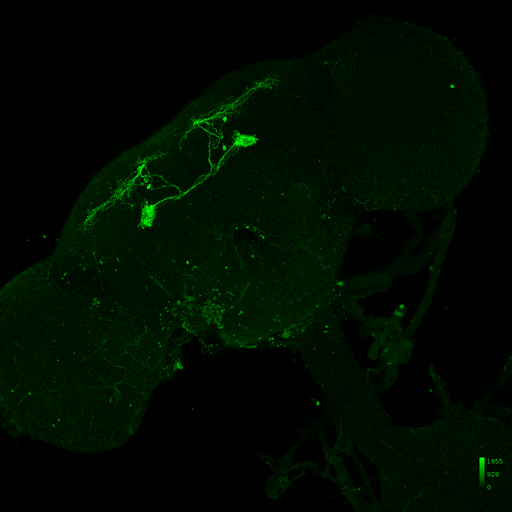

In [33]:
KEY = "Aso&Rubin 2016/MB043C/MB043C-20151009_41_B3-f-20x-brain-Split_GAL4-signals_mip.png"
s3_response_object = S3_CLIENT.get_object(Bucket="janelia-flylight-imagery",
                                          Key=KEY)
object_content = s3_response_object['Body'].read()
dataBytesIO = BytesIO(object_content)
img = Image.open(dataBytesIO)
width, height = img.size
img = img.resize((int(width / 2), int(height / 2)))
img

This is an unaligned signal channel MIP. Let's use the [ImageEnhance](https://pillow.readthedocs.io/en/stable/reference/ImageEnhance.html) module to adjust the contrast:

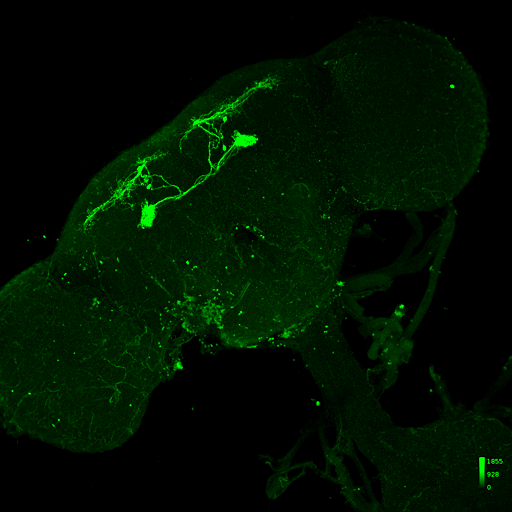

In [34]:
enhancer = ImageEnhance.Contrast(img)
enhancer.enhance(1.8)